In [2]:
import cv2
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [3]:
# import data
df = pd.read_csv("A_Z Handwritten Data.csv")
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = df.drop('0', axis=1).values.astype(np.uint8)
y = to_categorical(df['0'].values, num_classes=26, dtype=int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Image representation as 28x28 pixel
X_train = X_train.reshape((-1, 28, 28))
X_test = X_test.reshape((-1, 28, 28))

print("Train data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)

Train data shape:  (279337, 28, 28)
Test data shape:  (93113, 28, 28)


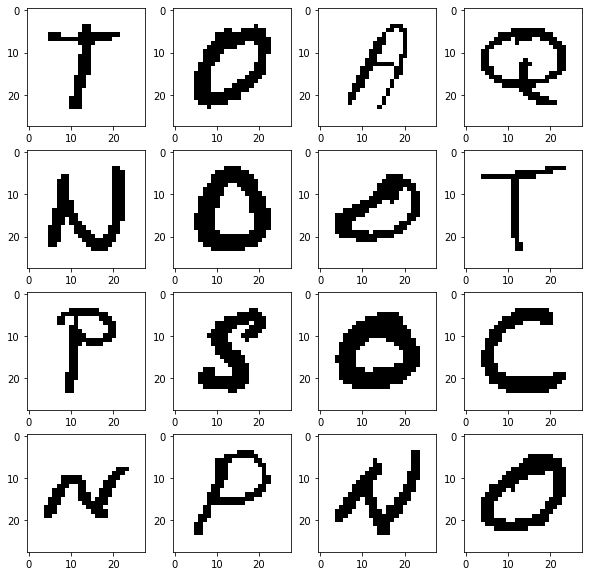

In [61]:
shuff = shuffle(X_train[:16])

fig, ax = plt.subplots(4, 4, figsize = (10, 10))
axes = ax.flatten()

for i in np.arange(0, 16):
    retval, im = cv2.threshold(shuff[i], 100, 200, cv2.THRESH_BINARY)
    axes[i].imshow(im, 'Greys')
plt.show()

In [62]:
# Data preparation for CNN

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

print("Training set shape is: ", X_train.shape)
print("Testing set shape is: ", X_test.shape)

Training set shape is:  (279337, 28, 28, 1)
Testing set shape is:  (93113, 28, 28, 1)


In [71]:
# Creating model

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Flatten())

model.add(Dense(64, activation ="relu"))
model.add(Dense(128, activation ="relu"))
model.add(Dense(26, activation ="softmax"))

In [72]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
8730/8730 [==============================] - 344s 39ms/step - loss: 0.1818 - accuracy: 0.9498 - val_loss: 0.0849 - val_accuracy: 0.9763
Epoch 2/5
8730/8730 [==============================] - 321s 37ms/step - loss: 0.0757 - accuracy: 0.9790 - val_loss: 0.0805 - val_accuracy: 0.9790
Epoch 3/5
8730/8730 [==============================] - 375s 43ms/step - loss: 0.0628 - accuracy: 0.9827 - val_loss: 0.0695 - val_accuracy: 0.9822
Epoch 4/5
8730/8730 [==============================] - 344s 39ms/step - loss: 0.0557 - accuracy: 0.9848 - val_loss: 0.0936 - val_accuracy: 0.9769
Epoch 5/5
8730/8730 [==============================] - 324s 37ms/step - loss: 0.0519 - accuracy: 0.9860 - val_loss: 0.0658 - val_accuracy: 0.9834


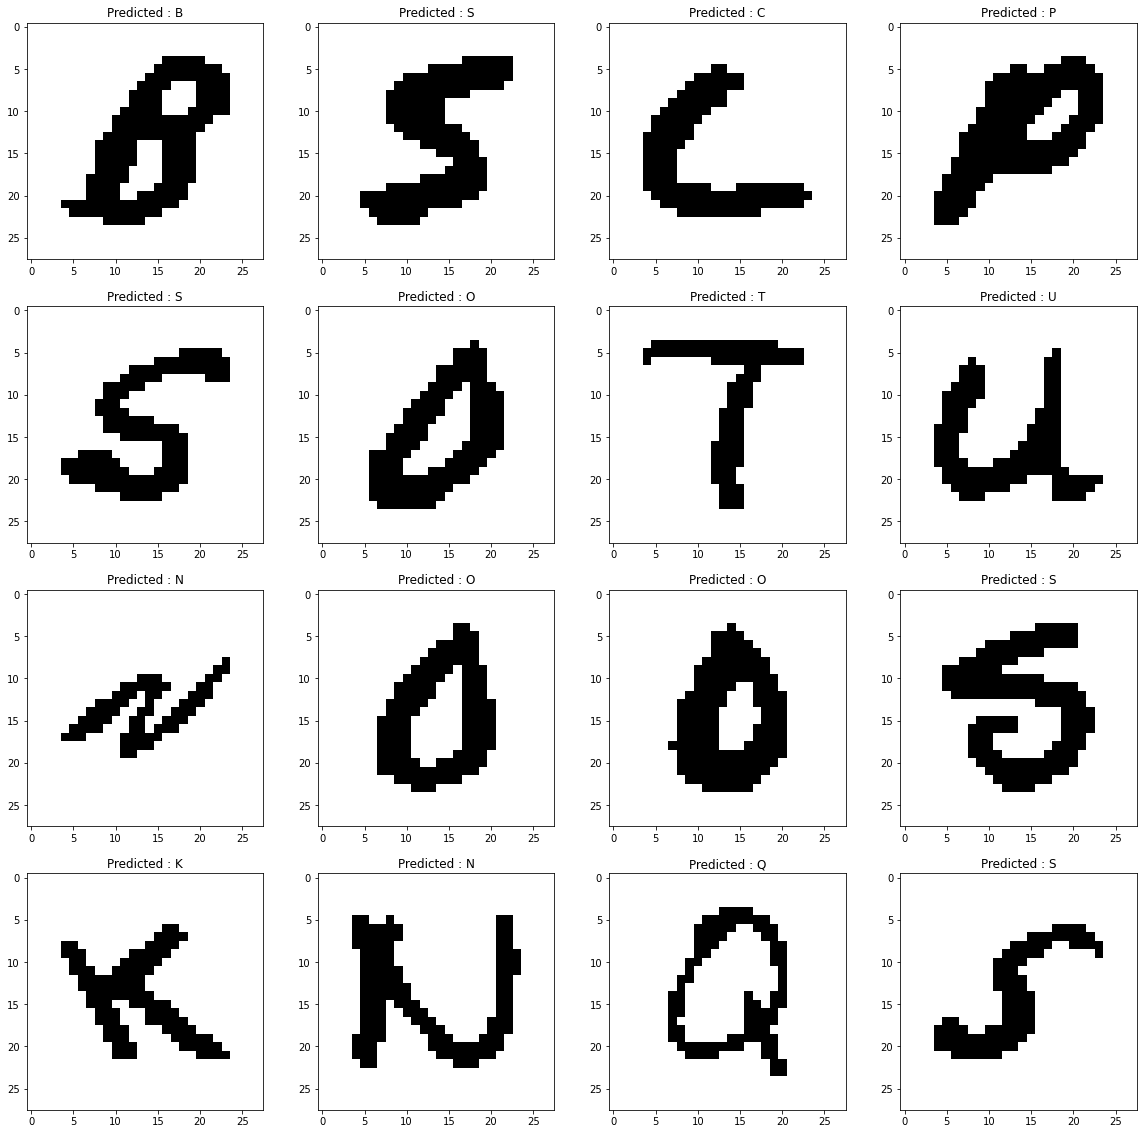

In [105]:
shuff = shuffle(X_test[:16])
ASCII_char = np.arange(65,91)
alphabet = []
for i in ASCII_char:
    alphabet.append(chr(i))

fig, ax = plt.subplots(4, 4, figsize = (20, 20))
axes = ax.flatten()

for i in np.arange(0, 16):
    im_resized = shuff[i].reshape((28, 28))
    retval, im = cv2.threshold(im_resized, 100, 200, cv2.THRESH_BINARY)
    axes[i].imshow(im, 'Greys')
    prediction = alphabet[np.argmax(model.predict(shuff[i].reshape((1,28,28,1))))]
    axes[i].set_title("Predicted : " + prediction )
plt.show()

In [108]:
model.save(r'model_handwritten.h5')